<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Ri-on/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install asyncpraw yfinance==0.2.54 dotenv

In [2]:
#Mount for api sharing
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please copy the shared .env file path in the **env_path** for OpenAi API

In [3]:
import os
from dotenv import load_dotenv

# Please copy the shared .env file path
env_path = '/content/drive/MyDrive/DAT_490/.env'
load_dotenv(dotenv_path=env_path)

# API
gpt_api_key = os.getenv("API_KEY")
print("API Key Loaded Successfully")

API Key Loaded Successfully


In [4]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [5]:
#Select the frim for the prediction
firm = "MSFT"

Top 10 Tech Companies in U.S.
- Apple Inc. – $3.69 trillion (AAPL)

- Nvidia Corporation – $3.43 trillion (NVDA)

- Microsoft Corporation – $3.09 trillion (MSFT)

- Amazon.com Inc. – $2.36 trillion (AMZN)

- Alphabet Inc. – $2.26 trillion (GOOGL)

- Meta Platforms Inc. – $1.76 trillion (META)

- Tesla Inc. – $1.14 trillion (TSLA)

- Broadcom Inc. – $1.06 trillion (AVGO)

- Oracle Corporation – $518.32 billion (ORCL)

- Advanced Micro Devices (AMD) – $450 billion (AMD)

In [6]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

Microsoft Corporation


In [7]:
#Get the firm name that is commonly used
import re

firm_name = re.sub(r'[^A-Za-z0-9 ]+', '', firm_name).split(' ')[0]
print(firm_name)

Microsoft


# Data Collection

### Stock Price

In [8]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-24 00:00:00-05:00,160.907872,167.410555,156.553559,163.900253,68311100,0.0,0.0
2020-02-25 00:00:00-05:00,167.074847,167.688669,160.792753,161.195587,68073300,0.0,0.0
2020-02-26 00:00:00-05:00,162.768509,166.173295,161.329863,163.209686,56206100,0.0,0.0
2020-02-27 00:00:00-05:00,156.639876,160.198121,151.518282,151.710098,93174900,0.0,0.0
2020-02-28 00:00:00-05:00,146.176107,157.013916,145.782874,155.383438,97012700,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-14 00:00:00-05:00,407.790009,408.910004,405.880005,408.429993,22758500,0.0,0.0
2025-02-18 00:00:00-05:00,408.000000,410.600006,406.500000,409.640015,21423100,0.0,0.0
2025-02-19 00:00:00-05:00,407.880005,415.489990,407.649994,414.769989,24114200,0.0,0.0


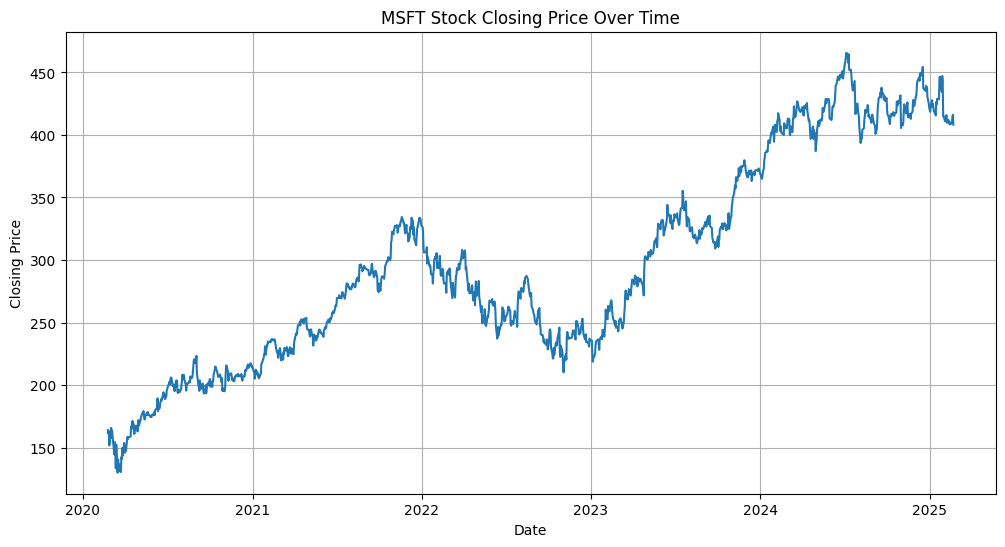

In [9]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [10]:
!pip install fredapi

In [11]:
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.682,716388.0,102.5873,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.081,720393.0,102.1219,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.229,725079.0,101.9736,1305.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [12]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Unrealized Gain Loss On Investment Securities,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,180160797.164637,0.138266,83831000000.0,1303000000.0,1303000000.0,61271000000.0,11686000000.0,52232000000.0,85134000000.0,73448000000.0,...,-1057000000.0,13000000.0,-150000000.0,-150000000.0,11686000000.0,11686000000.0,11686000000.0,-205000000.0,-205000000.0,61271000000.0
2022-06-30,43754000.0,0.131,99905000000.0,334000000.0,334000000.0,72738000000.0,14460000000.0,62650000000.0,100239000000.0,85779000000.0,...,-509000000.0,101000000.0,-5702000000.0,-5702000000.0,14460000000.0,14460000000.0,14460000000.0,-1000000.0,-1000000.0,72738000000.0
2023-06-30,-2850000.0,0.19,105155000000.0,-15000000.0,-15000000.0,72361000000.0,13861000000.0,65863000000.0,105140000000.0,91279000000.0,...,-303000000.0,30000000.0,-6059000000.0,-6059000000.0,13861000000.0,13861000000.0,13861000000.0,469000000.0,469000000.0,72361000000.0
2024-06-30,-99918000.0,0.182,133558000000.0,-549000000.0,-549000000.0,88136000000.0,22287000000.0,74114000000.0,133009000000.0,110722000000.0,...,-146000000.0,206000000.0,-4738000000.0,-4738000000.0,22287000000.0,22287000000.0,22287000000.0,245000000.0,245000000.0,88136000000.0


In [13]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Total Unusual Items',
 'Total Unusual Items Excluding Goodwill',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Special Income Charges',
 'Write Off',
 'Gain On Sale Of Security',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',


### Sentiment Analysis

##### yhfinance web scrapping

In [14]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

In [15]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list, "Title": article_title_list, "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,2 hours ago,"Feb. seasonality, Lag Seven, diversification: ...","US stocks (^DJI, ^IXIC, ^GSPC) sank in Friday'..."
1,8 hours ago,How policy impacts the Fed's 'data-dependent' ...,"US futures remain strong, but their trajectory..."
2,11 hours ago,Bubbly valuations on 'Magnificent 7' stocks li...,Getting exposure to the Magnificent 7 won't co...
3,2 hours ago,Why Vanguard Mega Cap Growth Index Fund (MGK) ...,We recently compiled a list of the 8 Best Vang...
4,2 hours ago,Physicists Question Microsoft’s Quantum Claim,The company said it created a “new state of ma...
5,3 hours ago,"Top Analyst Reports for Microsoft, Analog Devi...",Today's Research Daily features new research r...
6,4 hours ago,"Magnificent Seven Stocks: Amazon, Nvidia, Tesl...","Dubbed the Magnificent Seven stocks, Apple, Mi..."
7,9 hours ago,"SONY, MSFT, or NTDOY: Which Console Giant Wins...",Gaming is now the most lucrative entertainment...
8,10 hours ago,Your Gaming PC Could Help Train AI Models,Underused GPU chips—in game consoles or office...
9,10 hours ago,If I Could Only Buy 1 Warren Buffett Artificia...,Apple is Berkshire Hathaway's largest position...


##### Reddit web scrapping

In [17]:
import openai
import ast
import re
import time

# Initialize OpenAI client
client = openai.OpenAI(api_key=gpt_api_key)

# Function to get firm keywords
def get_firm_keywords(firm_name):
    while True:
        try:
            # Request completion from OpenAI
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=[
                    {"role": "system", "content": f"You strictly and carefully follow the instruction"},
                    {"role": "user", "content": f"""Give me ten most profitable or representative products
                    and one representative leader about the {firm_name} as a string list.
                    Prioritize the words that can influce the firm's stock price.
                    Do not include any other words or sentences. Just give me list like ["a", "b", "c"].
                    It should be 1-2 words but add "{firm_name}" to the word when the word can be confused with other common word.
                    For example, words like "Windows" and "Surface" should be changed to "Microsoft Windows" and "Microsoft Surface".
                    Do not include special characters. The keywords should be specific for the firm."""}
                ],
                max_tokens=100
            )
            output = response.choices[0].message.content
            # Convert response to list
            keywords = ast.literal_eval(response.choices[0].message.content)

            # Add firm name to the list and clean keywords
            keywords.append(firm_name)
            keywords = [re.sub(r"[^\w\s]", '', keyword.replace('_', ' ')).replace('-', ' ') for keyword in keywords]

            return keywords

        except (openai.OpenAIError, ValueError, SyntaxError) as e:
            print(f"An error occurred: {e}. Retrying...")
            time.sleep(1)  # Wait before retrying

# Get the keywords
keywords = get_firm_keywords(firm_name)
print(keywords)

['Microsoft Windows', 'Microsoft Office', 'Microsoft Azure', 'Microsoft Surface', 'Microsoft Teams', 'GitHub', 'LinkedIn', 'Xbox', 'Microsoft 365', 'Microsoft Dynamics', 'Satya Nadella', 'Microsoft']


In [19]:
from datetime import datetime
import asyncpraw #Library for Reddit API
import asyncio # for async environment
import nest_asyncio # Preventing async loop error
import re


nest_asyncio.apply()  # Prevent async loop error

# API
async def fetch_reddit(firm_name):
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    subreddit = await reddit.subreddit("worldnews")  # Searching from r/worldnews

    data = []

    # keyword search
    async for post in subreddit.search(firm_name, limit=500, sort='new', time_filter='all'):
        data.append({
            "Title": post.title,
            "Score": post.score,
            "Date Posted": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d'),
        })

    await reddit.close()

    # DataFrame
    df = pd.DataFrame(data)
    return df

# df_reddt = await fetch_reddit(firm_name) #For Single Keyword
# df_reddt

# loop for keywords
dataframes = []
for keyword in keywords:
    df = await fetch_reddit(keyword)
    dataframes.append(df)
df_reddit = pd.concat(dataframes, ignore_index=True)
#Removing Duplicates
df_reddit.drop_duplicates(inplace=True)
#Sorting
df_reddit = df_reddit.sort_values(by='Date Posted', ascending=False).reset_index(drop=True)

df_reddit

ServerError: received 500 HTTP response

##### Text Quantification

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores
df['Sentiment_Score'] = df['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
df

##### Data Merging (Sentiment Analysis)

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation